In [1]:
import json
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def consumirAPI(dirFile):
    # Consumir API
    url='https://randomuser.me/api/'
    respuesta=requests.get(url)
    data=json.loads(respuesta.content)
    results=data["results"]
    src=results[0]["picture"]["large"]
    print(src)

    # Traer imagen del API
    respuesta = requests.get(src)
    if respuesta.status_code == 200:
        with open(dirFile, 'wb') as f:
            f.write(respuesta.content)

In [3]:
def reconocer(imagen):
    # Reconocer rostro
    face_cascade = cv2.CascadeClassifier('xml/haarcascade_frontalface_default.xml')
    face = face_cascade.detectMultiScale(imagen, 1.3, 5)
    x=y=w=h=0
    if len(face):
        x= face[0][0]
        y= face[0][1]
        w= face[0][2]
        h= face[0][3]
    return x,y,w,h

In [28]:
def mezclar(imagen, mask, x, y, w, h):
    # filtros
    blur = cv2.blur(imagen,(17,17))
    laplacian = cv2.Laplacian(mask,cv2.CV_8U,ksize=17)
    # mezclas
    mezcla5= cv2.addWeighted(imagen,0.6,blur,0.4,0)
    mezcla6= cv2.addWeighted(mask,0.8,laplacian,0.2,0)
    
    parteMezcla= cv2.resize(mezcla6,(w,h))
    posx=x
    posy=y 
    rows,cols=parteMezcla.shape
  
    mezcla5[posx:rows+posx:1, posy:cols+posy:1]=cv2.addWeighted(mezcla5[posx:rows+posx:1, posy:cols+posy:1],0.7,parteMezcla,0.3,0)
    
    return mezcla5

https://randomuser.me/api/portraits/men/12.jpg


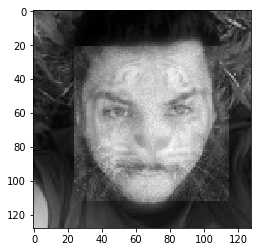

In [54]:
# Obtener imagen
file="result/api-1.jpg"
consumirAPI(file)

# Crear gris del imagen base
imagen = cv2.imread(file)
rgbImagen= cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Crear gris de la máscara
mask = cv2.imread('img/mask.jpg')
rgbMask= cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# Realizar el hibrido
x, y, w, h = reconocer(imagen)
if x!=0:
    hibrido= mezclar(rgbImagen, rgbMask, x, y, w, h)
    plt.imshow(hibrido, cmap='gray')
    cv2.imwrite("result/sv-4.png", hibrido)
else:
    print('buscar otra imagen')

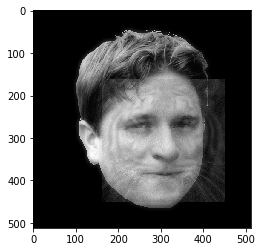

In [55]:
# Lo mismo pero usando una imagen local

file="img/kppa.png"

# Crear gris del imagen base
imagen = cv2.imread(file)
rgbImagen= cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Crear gris de la máscara
mask = cv2.imread('img/mask.jpg')
rgbMask= cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# Realizar el hibrido
x, y, w, h = reconocer(imagen)
if x!=0:
    hibrido= mezclar(rgbImagen, rgbMask, x, y, w, h)
    plt.imshow(hibrido, cmap='gray')
    cv2.imwrite("result/sv-5.png", hibrido)
else:
    print('buscar otra imagen')